# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [998]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import re

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [999]:
print("Сиды отвечают за 'закрепление' генерации рандомных значений. Соответственно, фиксируем их, чтобы данные не изменялись каждый раз при запуске кода.")

Сиды отвечают за 'закрепление' генерации рандомных значений. Соответственно, фиксируем их, чтобы данные не изменялись каждый раз при запуске кода.


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [1000]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [1001]:
# your code here
df_train.sample(10, random_state=42)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [1002]:
# Первые пять элементов (можно также сделать через loc/iloc)
# your code here
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [1003]:
# Последние пять элементов
df_test.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [1004]:
# your code here
df_train.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [1005]:
df_test.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [1006]:
# your code here
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [1007]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [1008]:
# your code here
df_train.duplicated(subset=['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission',
                            'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats']).sum()

1159

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [1009]:
# your code here
df_train[df_train.duplicated(subset=['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission',
                                     'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats'])]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [1010]:
# your code here
df_train = df_train.drop_duplicates(subset=['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission',
                                 'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats'])

In [1011]:
df_train.shape

(5840, 13)

In [1012]:
assert df_train.shape == (5840, 13) # Пройдено

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [1013]:
# your code here
df_train.index = range(0, len(df_train))

In [1014]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [1015]:
# вертикальная черта вместо конструкции Union для аннотации типов

def clean_data(value: str | float) -> str | float:
    '''
    Функция на вход принимает объект,
    который может быть или str или float.
    После чего очищает его от ед. измерения
    и на выходе отдает или None или численное значение
    в формате float.
    Если в качестве значения есть только ед. измерения,
    то функция вернет None
    '''
    
    assert type(value) in [str, float] 
    
    value = str(value).split()
    
    try:
        value[0] = float(value[0])
        return value[0]
    
    except:
        return None

In [1016]:
# Для начала уберем единицы измерения и кастанем во float
# mileage

df_train['mileage'] = df_train['mileage'].apply(clean_data)
df_train['mileage'] = df_train['mileage'].astype(float)

df_test['mileage'] = df_test['mileage'].apply(clean_data)
df_test['mileage'] = df_test['mileage'].astype(float)

# engine

df_train['engine'] = df_train['engine'].apply(clean_data)
df_train['engine'] = df_train['engine'].astype(float)

df_test['engine'] = df_test['engine'].apply(clean_data)
df_test['engine'] = df_test['engine'].astype(float)

# max_power

df_train['max_power'] = df_train['max_power'].apply(clean_data)
df_train['max_power'] = df_train['max_power'].astype(float)

df_test['max_power'] = df_test['max_power'].apply(clean_data)
df_test['max_power'] = df_test['max_power'].astype(float)

In [1017]:
# Единицы измерения успешно удалены

df_test[['mileage', 'engine', 'max_power']].head()

,mileage,engine,max_power
0,14.0,2498.0,112.0
1,21.5,1497.0,108.5
2,12.9,1799.0,130.0
3,25.1,1498.0,98.6
4,16.5,1172.0,65.0


In [1018]:
def process_torque(value: str | float) -> tuple:
    '''
    Функция на вход принимает объект
    в формате str или float (NaN-объект),
    а затем очищает полученную строку и
    сплитит на два объекта, первый из которых 
    является значением torque, а второй
    max_torque_rpm. Функция возвращает кортеж
    из двух значений.
    '''
    
    assert type(value) in (str, float)
       
    if value is np.nan:
        return None, None
    
    elif 'kg' in value or 'KG' in value : 
        value = value.replace('Nm(38.7kgm)@', '')
        pattern = r'[kgmrpmat@()NKG]'
        value = value.replace(',', '')
        value = re.sub(pattern, '', value)
        value = value.replace('  ', '').strip()
        value = value.split()
        value[1] = value[1][-4:]
        value[0] = float(value[0]) * 9.80665 # переводим в одни ед. измерения
        
        return value[0], value[1]
   
    else:        
        value = value.replace(',', '')
        pattern = r'[Nkgmrpmat@()RPMn/-]'
        value = re.sub(pattern, '', value)
        value = value.replace('  ', ' ')
        value = value.replace('4000+500', '4500').replace('3000+500', '3500')
        value = value.split()
       
        if len(value) == 2:
            value[1] = value[1][-4:]
            
            return value[0], value[1]
        
        else:
            return value[0], None

In [1019]:
# Разделяем столбец torque на два (torque и max_torque_rpm), а также удаляешь лишнее и преобразуем тип данных
# Для df_train

df_train['tuple_torque'] = df_train['torque'].apply(process_torque)
df_train['torque'] = df_train['tuple_torque'].apply(lambda x: x[0])
df_train['max_torque_rpm'] = df_train['tuple_torque'].apply(lambda x: x[1])

df_train['torque'] = df_train['torque'].astype(float)
df_train['max_torque_rpm'] = df_train['max_torque_rpm'].astype(float)

df_train = df_train.drop(['tuple_torque'], axis=1)

# Для df_test

df_test['tuple_torque'] = df_test['torque'].apply(process_torque)
df_test['torque'] = df_test['tuple_torque'].apply(lambda x: x[0])
df_test['max_torque_rpm'] = df_test['tuple_torque'].apply(lambda x: x[1])

df_test['torque'] = df_test['torque'].astype(float)
df_test['max_torque_rpm'] = df_test['max_torque_rpm'].astype(float)

df_test = df_test.drop(['tuple_torque'], axis=1)

In [1020]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.000000,5.0,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.000000,5.0,2500.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,219.668960,5.0,2750.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,112.776475,5.0,4500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.750000,5.0,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086.0,62.10,96.100000,5.0,3000.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90.000000,5.0,3500.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.700000,5.0,4000.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,235.359600,5.0,2750.0


In [1021]:
# Проверяем полученные результаты

# df_train.info()
# df_test.info()

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [1022]:
# Посмотрим сколько пропусков в данных

df_train.isna().sum()

name                0
year                0
selling_price       0
km_driven           0
fuel                0
seller_type         0
transmission        0
owner               0
mileage           186
engine            186
max_power         184
torque            187
seats             186
max_torque_rpm    190
dtype: int64

In [1023]:
# Заполним пропуски медианными значениями для df_train

df_train['mileage'] = df_train['mileage'].fillna(df_train['mileage'].median())
df_train['engine'] = df_train['engine'].fillna(df_train['engine'].median())
df_train['max_power'] = df_train['max_power'].fillna(df_train['max_power'].median())
df_train['torque'] = df_train['torque'].fillna(df_train['torque'].median())
df_train['seats'] = df_train['seats'].fillna(df_train['seats'].median())
df_train['max_torque_rpm'] = df_train['max_torque_rpm'].fillna(df_train['max_torque_rpm'].median())

# Заполним пропуски медианными значениями для df_test

df_test['mileage'] = df_test['mileage'].fillna(df_test['mileage'].median())
df_test['engine'] = df_test['engine'].fillna(df_test['engine'].median())
df_test['max_power'] = df_test['max_power'].fillna(df_test['max_power'].median())
df_test['torque'] = df_test['torque'].fillna(df_test['torque'].median())
df_test['seats'] = df_test['seats'].fillna(df_test['seats'].median())
df_test['max_torque_rpm'] = df_test['max_torque_rpm'].fillna(df_test['max_torque_rpm'].median())

In [1024]:
# Посмотрим сколько пропусков в данных осталось (все ок)

df_train.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
torque            0
seats             0
max_torque_rpm    0
dtype: int64


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [1025]:
print('Потому что sklearn не может обрабатывать категориальные признаки')
print('Это потребует дополнительной обработки в виде, например, one hot encoding')

Потому что sklearn не может обрабатывать категориальные признаки
Это потребует дополнительной обработки в виде, например, one hot encoding


In [1026]:
# Меняем тип данных для df_train
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

# Меняем тип данных для df_test
df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

In [1027]:
# Проверяем

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5840 non-null   float64
 9   engine          5840 non-null   int64  
 10  max_power       5840 non-null   float64
 11  torque          5840 non-null   float64
 12  seats           5840 non-null   int64  
 13  max_torque_rpm  5840 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 638.9+ KB


In [1028]:
df_train['km_driven'].value_counts()

120000    429
80000     356
70000     350
60000     327
50000     305
         ... 
79139       1
84784       1
130376      1
33500       1
191000      1
Name: km_driven, Length: 827, dtype: int64

In [1029]:
df_train.groupby('km_driven', as_index=False).agg({'name':'count'})\
        .sort_values(by='name', ascending=False).describe().round(2)

,km_driven,name
count,827.00,827.00
mean,83690.24,7.06
std,117986.23,34.50
min,1.00,1.00
25%,30464.00,1.00
50%,58945.00,1.00
75%,103327.50,2.00
max,2360457.00,429.00


In [1030]:
df_train['km_driven'].median()

70000.0

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.pairplot()`` позволяет сделать это в одну строчку

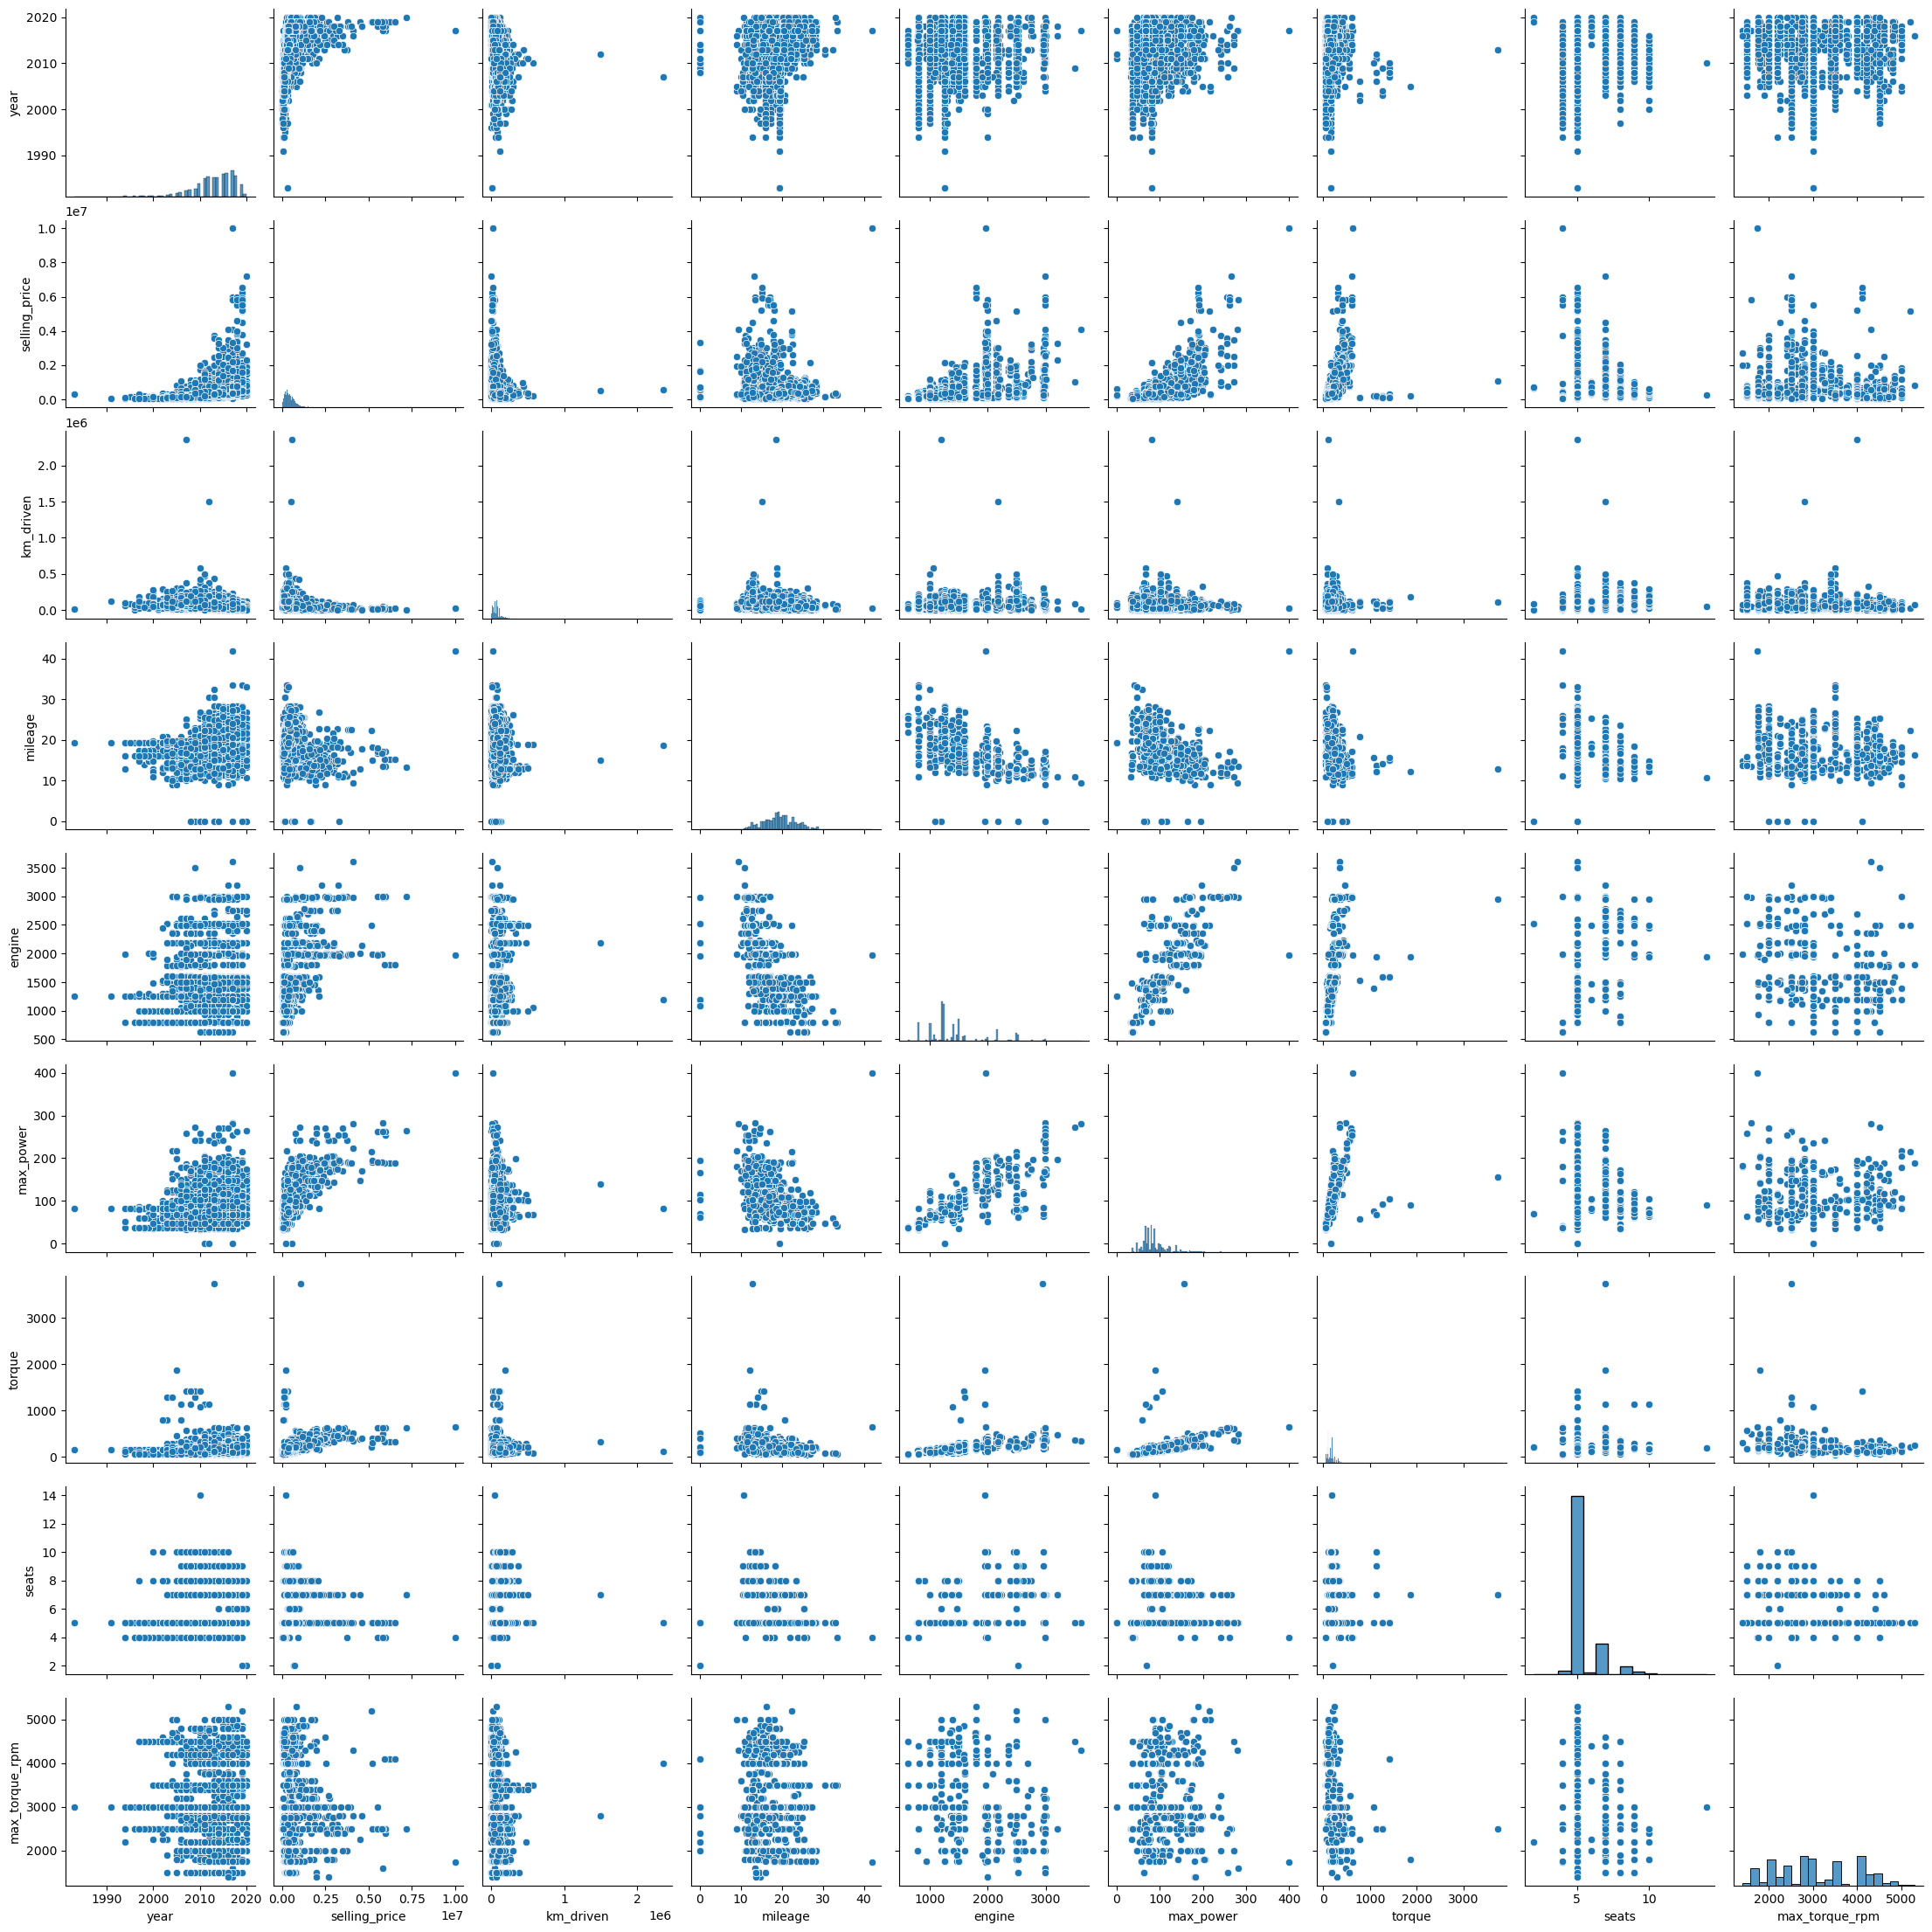

In [1031]:
# your code here

sns.pairplot(df_train)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

### Короткие выводы о взаимосвязи предикторов и целевой переменной

1. Все предикторы имею разную связь с целевой переменной
2. year - чем больше год, т.е. чем новее машина тем выше цена (при приближении к самым новым машинам цена возрастает.
3. km_driven (т.е. пробег) - соответственно, чем меньше пробег, тем больше цена.
4. mileage (пробег на одном баке) - значения находятся в рамках определенного диапазона. (по логике должны быть чем больше значения, тем больше цена), но в данном случае зависимост достаточно размыта (см. ниже коэффициент корреляции, он составляет -0.1)
5. engine (мощност двигателя) - чем выше значения показателя, тем выше цена
6. max_power - аналогичная чистуация, как и с мощностбю двигателя, т.е. чем выше значения показателя, тем выше цена
7. torque (крутящий момент) - похожая ситуация на два предыдущих предиктора, однако наблюдатеся более резкий угол наклона, т.е. цена реагирует значительно быстрее на изменение показателя для большинства автомобилей.
8. seats (количество посадочных мест) - в данном случае какая-то явная взаимосвязь отсутствует, т.е. наблюдаются значения предиктора, для которых цена может быть любой. 
9. max_torque_rpm - по аналогии с torque



In [1032]:
# Далее рассмотрим корреляцию между признаками и целевой переменной, а также между признаками

df_train.corr().round(2)

/var/folders/pf/2tq09w195zb3ggsh9d4q41jc0000gn/T/ipykernel_35500/4030280920.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.corr().round(2)


,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
year,1.00,0.43,-0.37,0.34,0.00,0.16,0.05,0.04,0.06
selling_price,0.43,1.00,-0.16,-0.10,0.45,0.69,0.43,0.15,-0.09
km_driven,-0.37,-0.16,1.00,-0.18,0.23,0.02,0.11,0.19,-0.22
mileage,0.34,-0.10,-0.18,1.00,-0.57,-0.37,-0.23,-0.45,-0.18
engine,0.00,0.45,0.23,-0.57,1.00,0.68,0.57,0.65,-0.26
max_power,0.16,0.69,0.02,-0.37,0.68,1.00,0.62,0.24,-0.02
torque,0.05,0.43,0.11,-0.23,0.57,0.62,1.00,0.30,-0.32
seats,0.04,0.15,0.19,-0.45,0.65,0.24,0.30,1.00,-0.22
max_torque_rpm,0.06,-0.09,-0.22,-0.18,-0.26,-0.02,-0.32,-0.22,1.00


### Короткие по корреляционным коэффициентам

Наибольшие значения по модулю целевая переменная показывает с признаками:
1. max_power
2. engine
3. torque (max_torque_rpm)
4. year
Такие показатели как km_driven и mileage показывают небольшие значения корреляции (что странно), однако судя по данным можно предположить, что медианное значение по km_driven (пробег) составляет 70_000, т.е. большинство машин еще не так сильно изношены, а значит не сильно потеряли в цене.

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

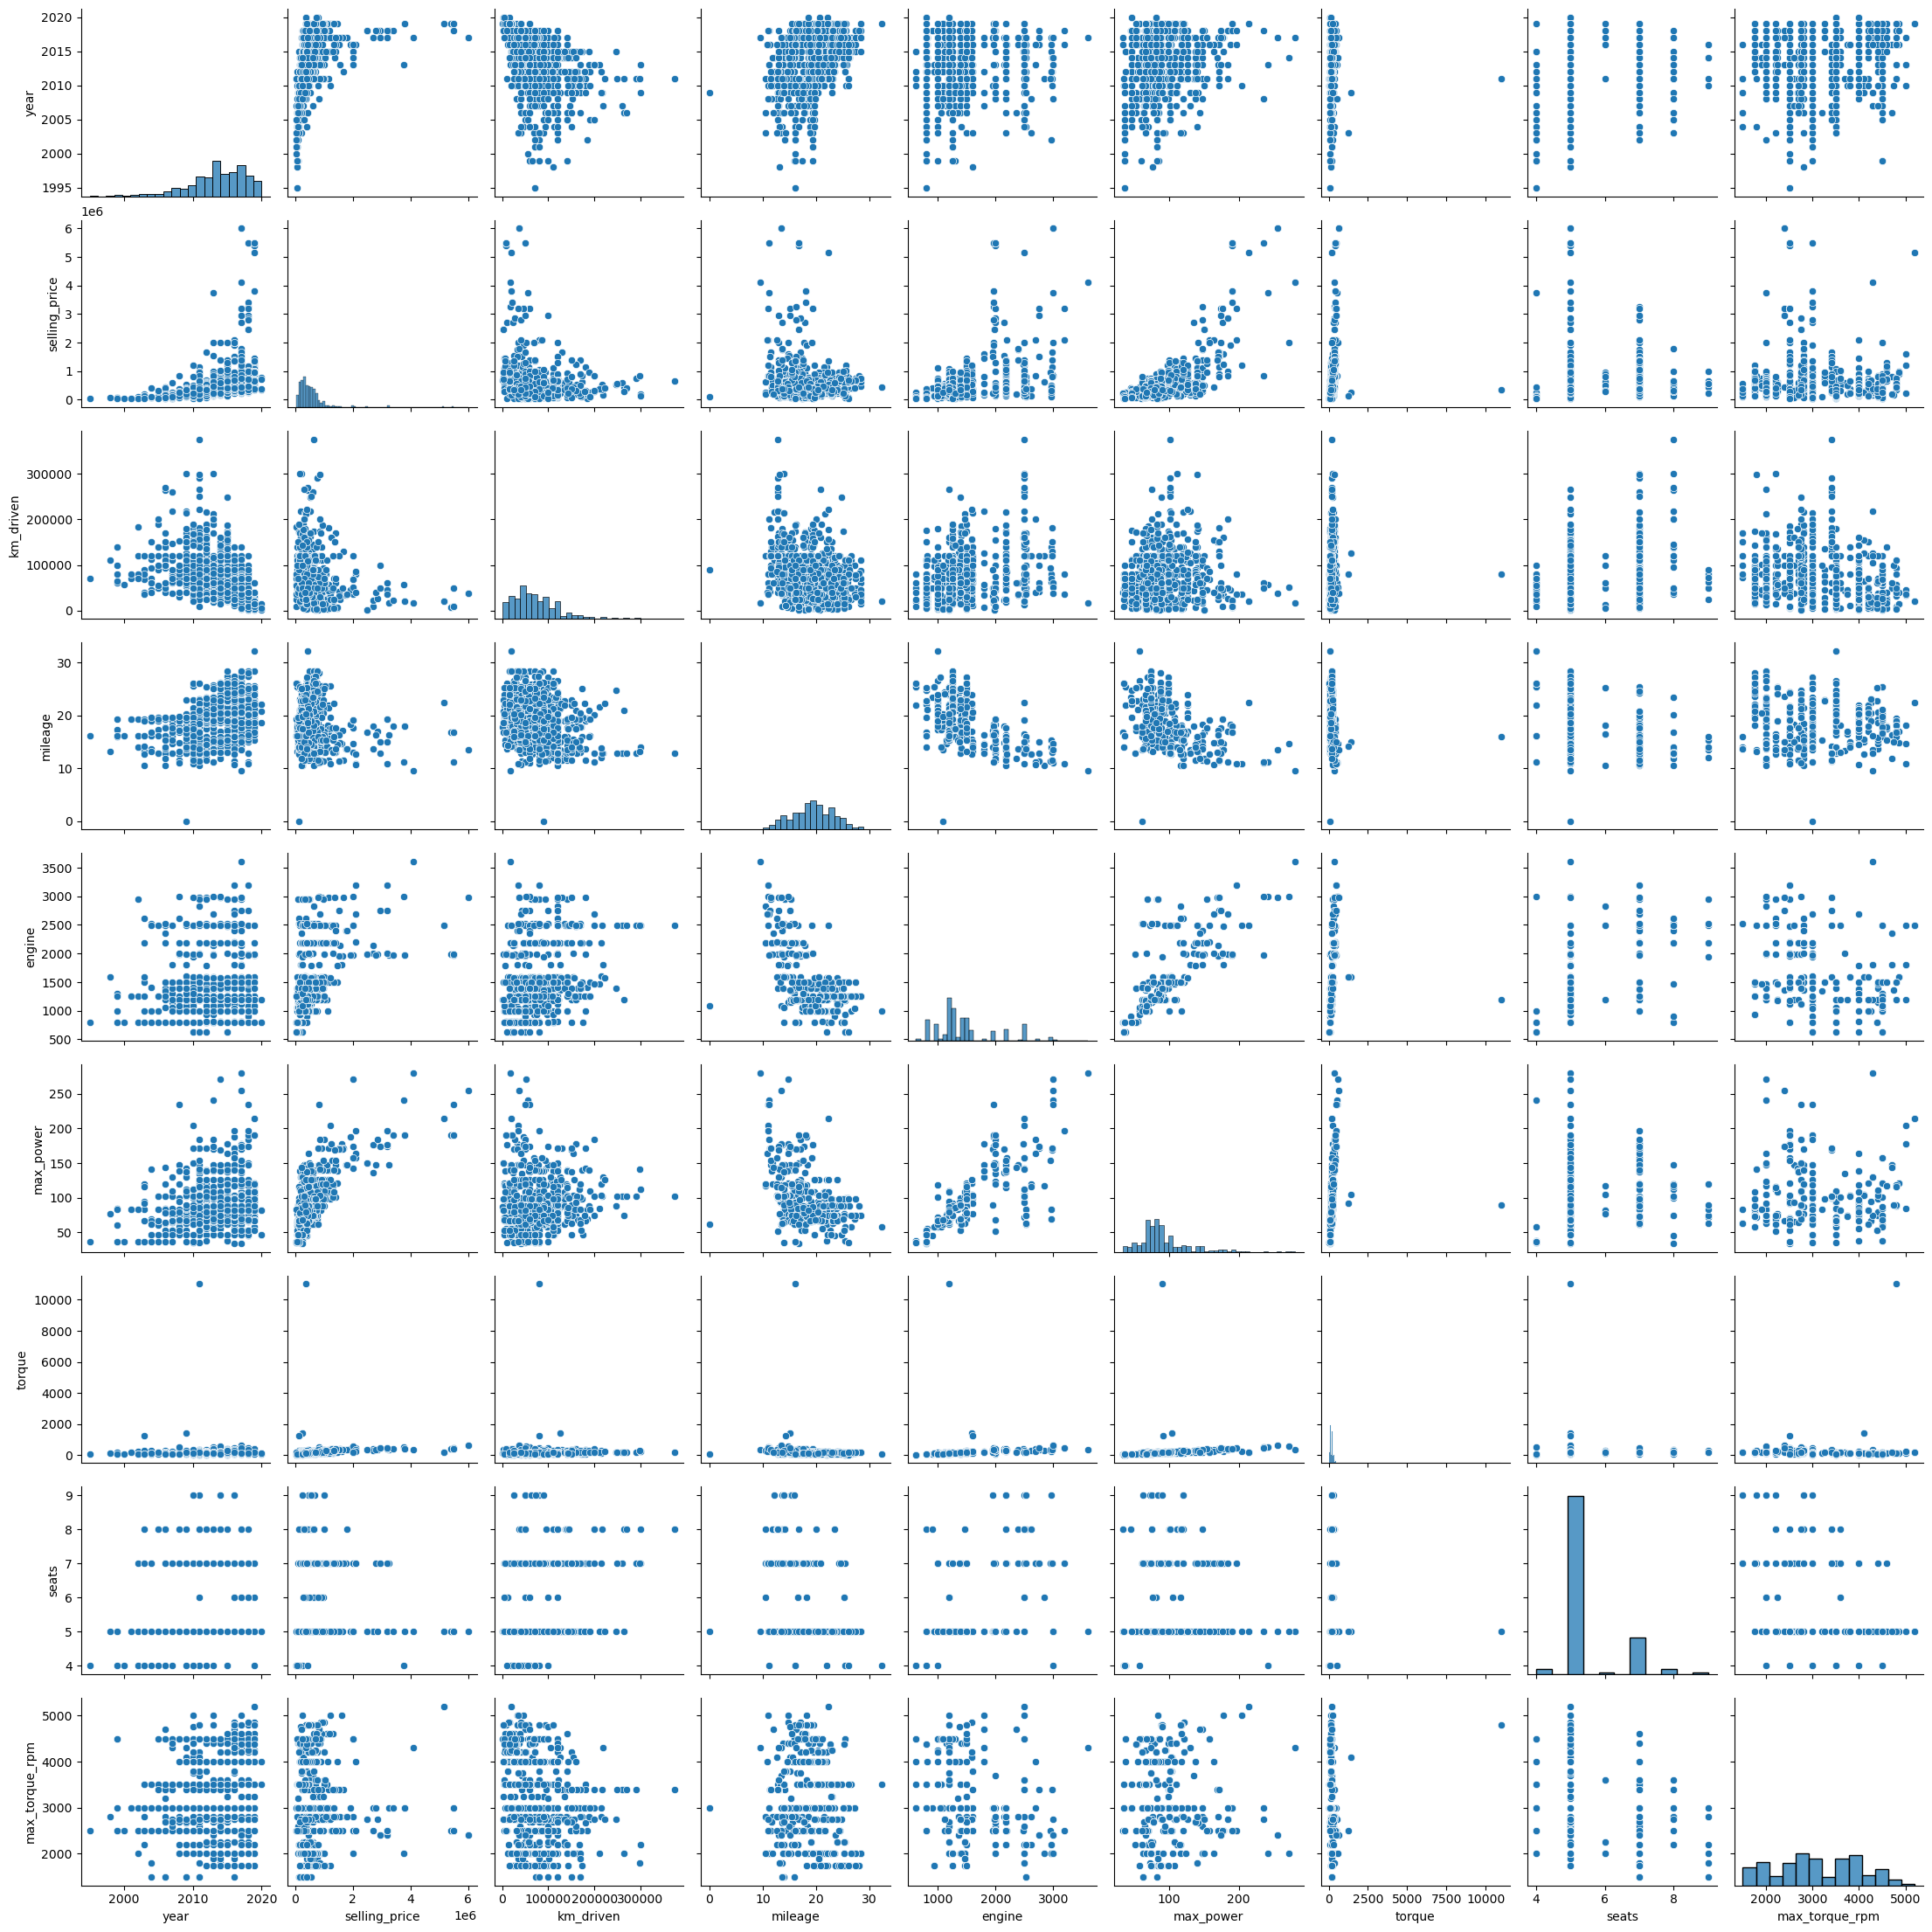

In [1033]:
# your code here

sns.pairplot(df_test)

### Схожесть взаимосвязей между признаками в df_train и df_test

Взаимосвязи между признаками и целевой переменной в df_train и df_test достаточно похожи, однако есть одна "пара", которая при рассмотрении графиков отличается - распределение цены от km_driven. Хотя, в данном случае на визуальную составляющую графиков сильно влияют полярные значения (шумы), а также разная размерность на осях (особенно на горизонтальных). Предположу, что если исключить полярные значения и подровнять оси, то все графики будут иметь достаточно схожую визульаную конфигурацию.  

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

<Axes: >

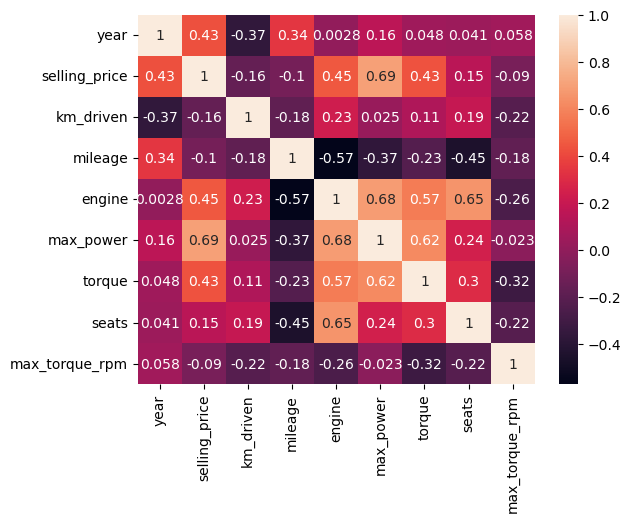

In [1034]:
# Выше уже выводил корреляционную таблицу (в этом случае будет для закрепления)

sns.heatmap(df_train[['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']].corr(), annot=True)

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

### Ответы на вопросы выше

1. engine и year (наименьшее значение корреляции по модулю) = 0.0028
2. если говорим про целевую переменную и признак, то это max_power, если имеется в виду только по признакам, то это max_power и engine
3. Судя по данным да, ибо корреляция у столбцов year и km_driven отрицательная, что свидетельствует об обратной линейной зависимости (чем меньше один показатель, тем больше другой)

(0.25 балла) <font color='#9933CC'> Отобразите диаграмму рассеяния для наиболее скоррелированной пары **признаков** (на трейне) </font>

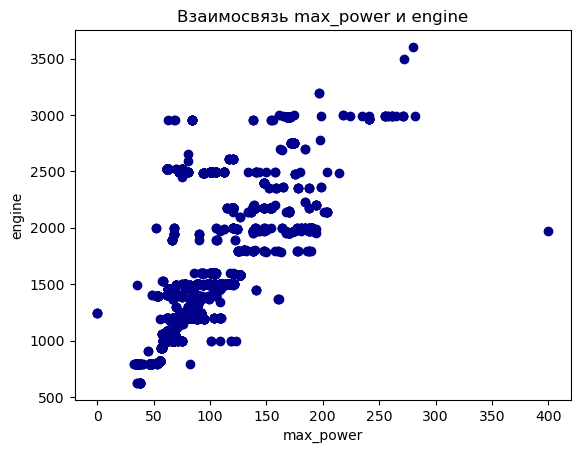

In [963]:
# Диаграмма рассеяния двух наиболее скоррелированных признаков (положительная корреллция)

plt.scatter(df_train['max_power'], df_train['engine'], color='darkblue')

plt.title('Взаимосвязь max_power и engine')

plt.xlabel('max_power')
plt.ylabel('engine')


plt.show()

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

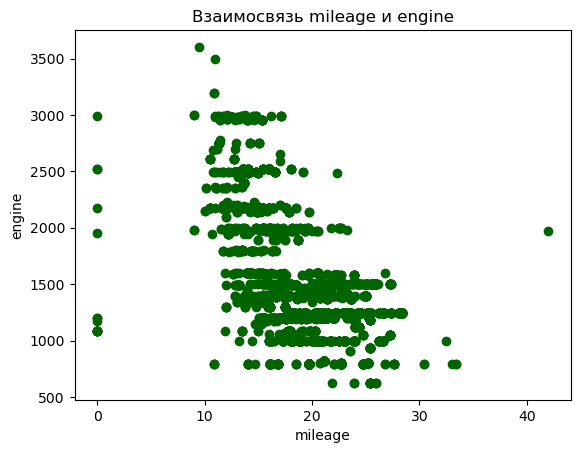

In [964]:
# # Диаграмма рассеяния двух наиболее скоррелированных признаков (отрицательная корреллция)

plt.scatter(df_train['mileage'], df_train['engine'], color='darkgreen')

plt.title('Взаимосвязь mileage и engine')

plt.xlabel('mileage')
plt.ylabel('engine')


plt.show()


### Пояснение

В данном случае получается, что чем больше значения признака mileage (сколько можно проехать на одном баке), тем слабее двигатель, т.к. у сильного двигателя будет большой расход на км и он будет много съедать топлива. В итоге данный показатель имеет отрицательную корреляцию, равную -0.57.

### Дополнительно

1. Примечательно отметить следующее, что столбец year почти со всеми признаками имеет или близкую к нулю корреляционную зависимость, или значения небольшие, при этом с целевой переменной признак year имеет значение коэффициента корреляции равным 0.43
2. Признак seats (количество мест) в данном случае обладает крайне низкой полезности, т.к. показатель имеет дочтаточно низкие значения коэффициентов корреляции (в том числе и с целевой переменной). 
3. Признак max_torque_rpm также большой роли не играет судя по значениям коэфф. корр.

In [1035]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.000000,5,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.000000,5,2500.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,219.668960,5,2750.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,112.776475,5,4500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,113.750000,5,4000.0


# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [1040]:
y_train = df_train['selling_price']
X_train = df_train[['year', 'km_driven','mileage','engine','max_power','torque','max_torque_rpm','seats']]

In [1041]:
# Подкрутил количество столбцов до 8
assert X_train.shape == (5840, 8)

In [1042]:
y_test = df_test['selling_price']
X_test = df_test[['year', 'km_driven','mileage','engine','max_power','torque','max_torque_rpm','seats']]

In [1043]:
# Подкрутил количество столбцов до 8
assert X_test.shape == (1000, 8)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [1059]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE


model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [1092]:
# Считаем метрики

mse_train = MSE(y_train, model.predict(X_train))
mse_test = MSE(y_test, model.predict(X_test))

r2_train = r2_score(y_train, model.predict(X_train))
r2_test = r2_score(y_test, model.predict(X_test))

print(f'mse_train: {mse_train}')
print(f'mse_test:  {mse_test}')
print('-' * 30)
print(f'r2_train:  {r2_train}')
print(f'r2_test:   {r2_test}')

mse_train: 114021054537.35295
mse_test:  229536579929.524
------------------------------
r2_train:  0.6022128261328732
r2_test:   0.6006868871109147


In [1130]:
weights = pd.DataFrame(model.coef_).T
weights.columns = X_train.columns

weights

,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,seats
0,40757.495354,-0.830248,-2979.446037,40.887292,10632.037231,-31.88059,-75.435062,-31548.941186


In [1629]:
model.intercept_

-82006736.4795484

In [1631]:
# m = pd.DataFrame(model.coef_).T
# m.columns = weights.columns
# m['intercept'] = model.intercept_
# m = m[['intercept', 'year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm', 'seats']]
# serialized_data = pickle.dumps(m)

# with open('data.pickle0', 'wb') as file:
#     file.write(serialized_data)

Видны какие-то большие значение по MSE, а R2 в обоих случаях получились практически одинаковыми. 

Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [1096]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Нормализуйте данные
X_norm_train = scaler.fit_transform(X_train)
df_X_norm_train = pd.DataFrame(X_norm_train, columns=X_train.columns)

X_norm_test = scaler.fit_transform(X_test)
df_X_norm_test = pd.DataFrame(X_norm_test, columns=X_train.columns)

# Выведите нормализованные данные
print(df_X_norm_train)

          year  km_driven   mileage    engine  max_power    torque  \
0     0.139570   1.191152  0.995867 -0.373643  -0.439550  0.120512   
1     0.139570   0.766619  0.428830  0.141162   0.493513  0.634441   
2    -0.837167   0.883158  0.895506 -0.068879   0.066175  0.374641   
3    -1.569719   0.766619 -0.835712 -0.270682   0.009281 -0.540945   
4     0.872122  -0.482007  0.177929 -0.478663  -0.191113 -0.532606   
...        ...        ...       ...       ...        ...       ...   
5835 -1.325535   1.948653 -0.379072 -0.707236  -0.815684 -0.683787   
5836 -0.104614  -0.398765 -0.133189 -0.888447  -0.657645 -0.736036   
5837 -0.104614   0.600136 -0.233549 -0.478663  -0.159821 -0.533034   
5838 -1.569719   0.749971 -0.660081  0.130865   0.698332  0.509039   
5839 -1.081351   0.766619 -0.032828 -0.373643  -0.442711  0.120512   

      max_torque_rpm     seats  
0          -1.187493 -0.434419  
1          -0.618345 -0.434419  
2          -0.333771 -0.434419  
3           1.658245 -0.434

### Снова обучаем модель на уже нормализованных данных

In [1097]:
model2 = LinearRegression()
model2.fit(df_X_norm_train, y_train)

LinearRegression()

In [1098]:
mse_train2 = MSE(y_train, model2.predict(df_X_norm_train))
mse_test2 = MSE(y_test, model2.predict(df_X_norm_test))

r2_train2 = r2_score(y_train, model2.predict(df_X_norm_train))
r2_test2 = r2_score(y_test, model2.predict(df_X_norm_test))

print(f'mse_train2: {mse_train2}')
print(f'mse_test2:  {mse_test2}')
print('-' * 30)
print(f'r2_train2:  {r2_train2}')
print(f'r2_test2:   {r2_test2}')

mse_train2: 114021054537.35266
mse_test2:  244762115863.27472
------------------------------
r2_train2:  0.6022128261328742
r2_test2:   0.5741997966829866


In [1553]:
pred_model2 = model2.predict(df_X_norm_train)

In [1564]:
df_X_norm_train

,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,seats
0,0.139570,1.191152,0.995867,-0.373643,-0.439550,0.120512,-1.187493,-0.434419
1,0.139570,0.766619,0.428830,0.141162,0.493513,0.634441,-0.618345,-0.434419
2,-0.837167,0.883158,0.895506,-0.068879,0.066175,0.374641,-0.333771,-0.434419
3,-1.569719,0.766619,-0.835712,-0.270682,0.009281,-0.540945,1.658245,-0.434419
4,0.872122,-0.482007,0.177929,-0.478663,-0.191113,-0.532606,1.089097,-0.434419
...,...,...,...,...,...,...,...,...
5835,-1.325535,1.948653,-0.379072,-0.707236,-0.815684,-0.683787,-0.049198,-0.434419
5836,-0.104614,-0.398765,-0.133189,-0.888447,-0.657645,-0.736036,0.519950,-0.434419
5837,-0.104614,0.600136,-0.233549,-0.478663,-0.159821,-0.533034,1.089097,-0.434419
5838,-1.569719,0.749971,-0.660081,0.130865,0.698332,0.509039,-0.333771,-0.434419


In [1129]:
weights2 = pd.DataFrame(model2.coef_).T
weights2.columns = X_train.columns

weights2

,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,seats
0,166913.00005,-49869.693971,-11874.975116,19855.738003,336373.30286,-3721.98268,-66270.221156,-30989.257976


In [1586]:
import pickle

serialized_data = pickle.dumps(weights2)

with open('data.pickle', 'wb') as file:
    file.write(serialized_data)


# with open('https://github.com/Alakirr/ML_study/data.pickle', 'rb') as file:
#     data = pickle.load(file)

# a = pd.read_pickle('https://github.com/Alakirr/ML_study/data.pickle')

# a

model2.intercept_

522960.09109588637

In [1582]:
weights2['intercept'] = model2.intercept_

In [1584]:
weights2 = weights2[['intercept', 'year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm', 'seats']]

In [1585]:
weights2

,intercept,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,seats
0,522960.091096,166913.00005,-49869.693971,-11874.975116,19855.738003,336373.30286,-3721.98268,-66270.221156,-30989.257976


In [1588]:
y_train

0       450000
1       370000
2       225000
3       130000
4       440000
         ...  
5835    120000
5836    260000
5837    320000
5838    135000
5839    382000
Name: selling_price, Length: 5840, dtype: int64

In [1591]:
df_train['max_power'].max()

400.0

Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

#### Самым информативным оказался признак max_power, он имеет самый большой вес, а также самый большой коэффициент корреляции.

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [1157]:
from sklearn.linear_model import Lasso

model3 = Lasso(alpha=10000)
model3.fit(df_X_norm_train, y_train)

mse_train3 = MSE(y_train, model3.predict(df_X_norm_train))
mse_test3 = MSE(y_test, model3.predict(df_X_norm_test))

r2_train3 = r2_score(y_train, model3.predict(df_X_norm_train))
r2_test3 = r2_score(y_test, model3.predict(df_X_norm_test))

print(f'mse_train3: {mse_train3}')
print(f'mse_test3:  {mse_test3}')
print('-' * 30)
print(f'r2_train3:  {r2_train3}')
print(f'r2_test3:   {r2_test3}')

mse_train3: 114827405156.8928
mse_test3:  253761715885.89047
------------------------------
r2_train3:  0.5993996971419666
r2_test3:   0.5585436502818738


In [1158]:
weights3 = pd.DataFrame(model3.coef_).T
weights3.columns = X_train.columns

weights3

,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,seats
0,153973.35865,-40154.895073,0.0,0.0,336997.258116,0.0,-48659.558176,-1379.521631


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

#### Если установить коэфф. alpha сопоставимым с весами, то часть из них зануляются, т.к. веса имеют слишком малые значения по модулю.

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [1185]:
from sklearn.model_selection import GridSearchCV
import time


model4 = Lasso()
numbers = [_ for _ in range(4_000, 10_000)]

parameters = {'alpha': numbers} 

g = GridSearchCV(model4, parameters, scoring='neg_mean_squared_error', cv=10)

g.fit(df_X_norm_train, y_train)

print(g.best_params_)

{'alpha': 7520}


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

Видимо, 6_000 * 10 = 60_000

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

#### Самый лучший коэффициент регуляризации составляет 7520. Да, занулились веса по следующим признакам: mileage,	engine и torque (демонстрация внизу).

In [1188]:
model4 = Lasso(alpha=7520)
model4.fit(df_X_norm_train, y_train)

mse_train4 = MSE(y_train, model4.predict(df_X_norm_train))
mse_test4 = MSE(y_test, model4.predict(df_X_norm_test))

r2_train4 = r2_score(y_train, model4.predict(df_X_norm_train))
r2_test4 = r2_score(y_test, model4.predict(df_X_norm_test))

print(f'mse_train4: {mse_train4}')
print(f'mse_test4:  {mse_test4}')
print('-' * 30)
print(f'r2_train4:  {r2_train4}')
print(f'r2_test4:   {r2_test4}')

mse_train4: 114576501265.71858
mse_test4:  251797749310.65997
------------------------------
r2_train4:  0.6002750297740619
r2_test4:   0.5619602630370442


In [1189]:
weights4 = pd.DataFrame(model4.coef_).T
weights4.columns = X_train.columns

weights4

,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,seats
0,155563.980139,-42240.212282,-0.0,0.0,340107.207255,0.0,-52450.009327,-5122.870289


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [1193]:
from sklearn.linear_model import ElasticNet


model5 = ElasticNet()
numbers = [_ for _ in range(1, 5_000)]

parameters = {'alpha': numbers} 

g = GridSearchCV(model5, parameters, scoring='neg_mean_squared_error', cv=10)

g.fit(df_X_norm_train, y_train)

print(g.best_params_)

{'alpha': 1}


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

#### Видимо, 1 - лучшее значение для гиперпатаметра.

In [1196]:
model5 = ElasticNet(alpha=1, l1_ratio=1)
model5.fit(df_X_norm_train, y_train)

mse_train5 = MSE(y_train, model5.predict(df_X_norm_train))
mse_test5 = MSE(y_test, model5.predict(df_X_norm_test))

r2_train5 = r2_score(y_train, model5.predict(df_X_norm_train))
r2_test5 = r2_score(y_test, model5.predict(df_X_norm_test))

print(f'mse_train5: {mse_train5}')
print(f'mse_test5:  {mse_test5}')
print('-' * 30)
print(f'r2_train5:  {r2_train5}')
print(f'r2_test5:   {r2_test5}')

mse_train5: 114021054557.83215
mse_test5:  244763410710.0967
------------------------------
r2_train5:  0.602212826061427
r2_test5:   0.5741975441038318


In [1551]:
pred_model5 = model5.predict(df_X_norm_train)

In [1197]:
weights5 = pd.DataFrame(model5.coef_).T
weights5.columns = X_train.columns

weights5


,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,seats
0,166910.803758,-49868.718222,-11871.553084,19853.443165,336372.437817,-3718.474184,-66266.922918,-30985.419043


Предлагаем вам оставить попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [1198]:
# your code here
df_train.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.0,5,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.0,5,2500.0


In [1203]:
X_train_cat = df_train[['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']]
X_train_cat.shape

(5840, 12)

In [1204]:
assert X_train_cat.shape == (5840, 12) # Подкрутил, т.к. у меня +2 шт torque

In [1205]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

### Чтобы обработать столбец seats в get_dummies, необходимо у данного признака сменить тип данных на object, когда столбец равен int, то не корректно работает.

In [1223]:
X_train_cat['seats'] = X_train_cat['seats'].astype(str)

In [1224]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

X_dummis = pd.get_dummies(X_train_cat[['fuel', 'seller_type', 'transmission', 'owner', 'seats']])

X_dummis.head()

,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,...,owner_Third Owner,seats_10,seats_14,seats_2,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9
0,0,1,0,0,0,1,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,1,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,1,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,1,0,1,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0


In [1238]:
# Объединяю таблицы X_dummis и X_train_cat

new_Xtrain = X_train_cat.merge(X_dummis, left_index=True, right_index=True)

In [1239]:
new_Xtrain 

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,...,owner_Third Owner,seats_10,seats_14,seats_2,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.000000,...,0,0,0,0,0,1,0,0,0,0
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.000000,...,0,0,0,0,0,1,0,0,0,0
2,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,219.668960,...,0,0,0,0,0,1,0,0,0,0
3,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,112.776475,...,0,0,0,0,0,1,0,0,0,0
4,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,113.750000,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2008,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,96.100000,...,0,0,0,0,0,1,0,0,0,0
5836,2013,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,90.000000,...,0,0,0,0,0,1,0,0,0,0
5837,2013,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,113.700000,...,0,0,0,0,0,1,0,0,0,0
5838,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,235.359600,...,0,0,0,0,0,1,0,0,0,0


In [1240]:
new_Xtrain = new_Xtrain.drop(['fuel', 'seller_type', 'transmission', 'owner', 'seats'], axis=1)

In [1241]:
new_Xtrain

,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,fuel_CNG,fuel_Diesel,fuel_LPG,...,owner_Third Owner,seats_10,seats_14,seats_2,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9
0,2014,145500,23.40,1248,74.00,190.000000,2000.0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,2014,120000,21.14,1498,103.52,250.000000,2500.0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,2010,127000,23.00,1396,90.00,219.668960,2750.0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,2007,120000,16.10,1298,88.20,112.776475,4500.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2017,45000,20.14,1197,81.86,113.750000,4000.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2008,191000,17.92,1086,62.10,96.100000,3000.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5836,2013,50000,18.90,998,67.10,90.000000,3500.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5837,2013,110000,18.50,1197,82.85,113.700000,4000.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5838,2007,119000,16.80,1493,110.00,235.359600,2750.0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

### Повысился коэфф. R^2 с 0.6 до 0.66 на трейне, на тесте практически без изменений (решение представлено ниже). 

In [1243]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


model6 = Ridge()
numbers = [_ for _ in range(1, 1_000)]

parameters = {'alpha': numbers} 

g = GridSearchCV(model6, parameters, scoring='r2', cv=10)

g.fit(new_Xtrain, y_train)

print(g.best_params_)
# your code here

{'alpha': 7}


In [1251]:
model6 = Ridge(alpha=7)
model6.fit(new_Xtrain, y_train)

mse_train6 = MSE(y_train, model6.predict(new_Xtrain))
mse_test6 = MSE(y_test, model5.predict(df_X_norm_test))

r2_train6 = r2_score(y_train, model6.predict(new_Xtrain))
r2_test6 = r2_score(y_test, model5.predict(df_X_norm_test))

print(f'mse_train5: {mse_train6}')
print(f'mse_test5:  {mse_test6}')
print('-' * 30)
print(f'r2_train5:  {r2_train6}')
print(f'r2_test5:   {r2_test6}')

mse_train5: 95719084145.11455
mse_test5:  244763410710.0967
------------------------------
r2_train5:  0.6660632185719586
r2_test5:   0.5741975441038318


In [1549]:
model6_pred = model6.predict(new_Xtrain)

In [1563]:
new_Xtrain

,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,fuel_CNG,fuel_Diesel,fuel_LPG,...,owner_Third Owner,seats_10,seats_14,seats_2,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9
0,2014,145500,23.40,1248,74.00,190.000000,2000.0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,2014,120000,21.14,1498,103.52,250.000000,2500.0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,2010,127000,23.00,1396,90.00,219.668960,2750.0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,2007,120000,16.10,1298,88.20,112.776475,4500.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2017,45000,20.14,1197,81.86,113.750000,4000.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2008,191000,17.92,1086,62.10,96.100000,3000.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5836,2013,50000,18.90,998,67.10,90.000000,3500.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5837,2013,110000,18.50,1197,82.85,113.700000,4000.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5838,2007,119000,16.80,1493,110.00,235.359600,2750.0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [1312]:
# Буду добавлять фичи в X_train и X_test
X_train.head()

,year,km_driven,mileage,engine,max_power,horsepower
0,270692192515710148123853056,145500,23.40,1248,74.00,53.333333
1,270692192515710148123853056,120000,21.14,1498,103.52,70.860927
2,266421003244912160100000000,127000,23.00,1396,90.00,60.695652
3,263256425352662725870452801,120000,16.10,1298,88.20,80.621118
4,273934786278325916122525441,45000,20.14,1197,81.86,59.433962


In [1304]:
X_test.head(2)

,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,seats
0,2010,168000,14.0,2498,112.0,260.0,2200.0,7
1,2017,25000,21.5,1497,108.5,260.0,2750.0,5


In [1310]:
# Пункт 1.

# X_train['year'] = X_train['year'].apply(lambda x: x ** 2) # Слишком большие значения получаются
# X_test['year'] = X_test['year'].apply(lambda x: x ** 2)

X_train['horsepower'] = X_train['engine'] / X_train['mileage']
X_test['horsepower'] = X_test['engine'] / X_test['mileage']

# Удалю столбцы torque, max_torque_rpm и seats

X_train = X_train[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'horsepower']]
X_test = X_test[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'horsepower']]



/var/folders/pf/2tq09w195zb3ggsh9d4q41jc0000gn/T/ipykernel_35500/1296772502.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['year'] = X_train['year'].apply(lambda x: x ** 2)
/var/folders/pf/2tq09w195zb3ggsh9d4q41jc0000gn/T/ipykernel_35500/1296772502.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['year'] = X_test['year'].apply(lambda x: x ** 2)


In [1315]:
train_year = X_train['year']
test_year = X_test['year']

X_train = X_train[['km_driven', 'mileage', 'engine', 'max_power', 'horsepower']]
X_test = X_test[['km_driven', 'mileage', 'engine', 'max_power', 'horsepower']]


In [1318]:
from sklearn.preprocessing import PolynomialFeatures


# Похоже, что слишком большие значения для подобных преобразований


# pf = PolynomialFeatures(degree = 1.2)

# pf.fit(X_train)

# X_train_new = pf.transform(X_train)
# X_test_new  = pf.transform(X_test)



In [1324]:
# Значит попробуем раскидать на группы признак с владельцами
X_train_cat.head(2)


,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.0,5,2000.0
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.0,5,2500.0


In [1361]:
X_train = X_train.merge(X_train_cat, left_index=True, right_index=True)

In [1362]:
X_train.head(2)

,km_driven_x,engine_x,max_power_x,horsepower,owner group,year_x,year_y,km_driven_y,fuel,seller_type,transmission,owner,mileage,engine_y,max_power_y,torque,seats,max_torque_rpm
0,145500,1248,74.00,53.333333,One,270692192515710148123853056,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.0,5,2000.0
1,120000,1498,103.52,70.860927,More than one,270692192515710148123853056,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.0,5,2500.0


In [1363]:
X_train = X_train[['km_driven_x', 'engine_x', 'max_power_x', 'horsepower', 'owner']]

In [1364]:
X_train['owner group'] = np.where(X_train['owner'] == 'First Owner', 'One',
                         np.where(X_train['owner'] == 'Second Owner', 'More than one',
                         np.where(X_train['owner'] == 'Third Owner', 'More than one',
                         np.where(X_train['owner'] == 'Fourth & Above Owner', 'More than one', 'other'))))

In [1365]:
X_train

,km_driven_x,engine_x,max_power_x,horsepower,owner,owner group
0,145500,1248,74.00,53.333333,First Owner,One
1,120000,1498,103.52,70.860927,Second Owner,More than one
2,127000,1396,90.00,60.695652,First Owner,One
3,120000,1298,88.20,80.621118,First Owner,One
4,45000,1197,81.86,59.433962,First Owner,One
...,...,...,...,...,...,...
5835,191000,1086,62.10,60.602679,First Owner,One
5836,50000,998,67.10,52.804233,Second Owner,More than one
5837,110000,1197,82.85,64.702703,First Owner,One
5838,119000,1493,110.00,88.869048,Fourth & Above Owner,More than one


In [1366]:
# Пункт 3 сделаем dummi-столцы по owner group

X_test = X_test.merge(df_test['owner'], left_index=True, right_index=True)

In [1367]:
X_test['owner group'] = np.where(X_test['owner'] == 'First Owner', 'One',
                         np.where(X_test['owner'] == 'Second Owner', 'More than one',
                         np.where(X_test['owner'] == 'Third Owner', 'More than one',
                         np.where(X_test['owner'] == 'Fourth & Above Owner', 'More than one', 'other'))))

In [1523]:
X_test = X_test.merge(test_year, left_index=True, right_index=True)

In [1524]:
X_train = X_train.merge(train_year, left_index=True, right_index=True)

In [1370]:
X_train = X_train.rename(columns={'km_driven_x':'km_driven',
                        'engine_x':'engine',
                        'max_power_x':'max_power'})

In [1371]:
X_train = X_train[['km_driven', 'engine', 'max_power', 'horsepower', 'owner group', 'year']]

In [1376]:
X_test = X_test[['km_driven', 'engine', 'max_power', 'horsepower', 'owner group', 'year']]

In [1392]:
X_test = X_test.rename(columns={'year_x':'year'})

In [1380]:
X_train_groups = pd.get_dummies(X_train['owner group'])

In [1382]:
X_test_groups = pd.get_dummies(X_test['owner group'])

In [1383]:
X_train = X_train.merge(X_train_groups, left_index=True, right_index=True)
X_test = X_test.merge(X_test_groups, left_index=True, right_index=True)

In [1394]:
# X_train = X_train[['km_driven', 'engine', 'max_power', 'horsepower', 'year', 'More than one', 'One', 'other']]
# X_test = X_test[['km_driven', 'engine', 'max_power', 'horsepower', 'year', 'More than one', 'One', 'other']]

In [1396]:
# Финальный рывок нормализация + попробуем подобрать гиперпараметр через GridSearchCV + регуляризация L2

In [1400]:
X_train

,km_driven,engine,max_power,horsepower,year,More than one,One,other
0,145500,1248,74.00,53.333333,270692192515710148123853056,0,1,0
1,120000,1498,103.52,70.860927,270692192515710148123853056,1,0,0
2,127000,1396,90.00,60.695652,266421003244912160100000000,0,1,0
3,120000,1298,88.20,80.621118,263256425352662725870452801,0,1,0
4,45000,1197,81.86,59.433962,273934786278325916122525441,0,1,0
...,...,...,...,...,...,...,...,...
5835,191000,1086,62.10,60.602679,264307610106229457699209216,0,1,0
5836,50000,998,67.10,52.804233,269618817179200871400002721,1,0,0
5837,110000,1197,82.85,64.702703,269618817179200871400002721,0,1,0
5838,119000,1493,110.00,88.869048,263256425352662725870452801,1,0,0


In [1462]:
# столбец год слишком большой
X_train = X_train[['km_driven', 'engine', 'max_power', 'horsepower', 'More than one', 'One', 'other']]
X_test = X_test[['km_driven', 'engine', 'max_power', 'horsepower', 'More than one', 'One', 'other', ]]

In [1463]:
X_train['horsepower'] = X_train['horsepower'].round(3)
X_test['horsepower'] = X_test['horsepower'].round(3)

/var/folders/pf/2tq09w195zb3ggsh9d4q41jc0000gn/T/ipykernel_35500/440330623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['horsepower'] = X_train['horsepower'].round(3)
/var/folders/pf/2tq09w195zb3ggsh9d4q41jc0000gn/T/ipykernel_35500/440330623.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['horsepower'] = X_test['horsepower'].round(3)


In [1464]:
X_train = X_train.replace([np.inf], -1)

In [1465]:
X_test = X_test.replace([np.inf], -1)

In [1466]:
X_train.head()

,km_driven,engine,max_power,horsepower,More than one,One,other
0,145500,1248,74.00,53.333,0,1,0
1,120000,1498,103.52,70.861,1,0,0
2,127000,1396,90.00,60.696,0,1,0
3,120000,1298,88.20,80.621,0,1,0
4,45000,1197,81.86,59.434,0,1,0


In [1467]:
X_test

,km_driven,engine,max_power,horsepower,More than one,One,other
0,168000,2498,112.00,178.429,0,1,0
1,25000,1497,108.50,69.628,0,1,0
2,218463,1799,130.00,139.457,0,1,0
3,173000,1498,98.60,59.681,0,1,0
4,70000,1172,65.00,71.030,1,0,0
...,...,...,...,...,...,...,...
995,100000,1086,68.05,54.821,1,0,0
996,50000,1197,81.83,64.355,1,0,0
997,40000,1396,90.00,60.696,0,1,0
998,25000,1197,78.90,58.792,0,1,0


In [1525]:
from sklearn import preprocessing

normaliser = preprocessing.MinMaxScaler()
norm_X_train = normaliser.fit_transform(X_train)
norm_X_test = normaliser.fit_transform(X_test)

df_X_norm2_tr = pd.DataFrame(norm_X_train)
df_X_norm2_te = pd.DataFrame(norm_X_test)

In [1526]:
df_X_norm2_tr.columns = X_train.columns
df_X_norm2_te.columns = X_test.columns

In [1497]:
df_X_norm2_tr

,km_driven,engine,max_power,horsepower,More than one,One,other
0,0.061640,0.209396,0.185000,0.142843,0.0,1.0,0.0
1,0.050837,0.293289,0.258800,0.188925,1.0,0.0,0.0
2,0.053803,0.259060,0.225000,0.162201,0.0,1.0,0.0
3,0.050837,0.226174,0.220500,0.214584,0.0,1.0,0.0
4,0.019064,0.192282,0.204650,0.158883,0.0,1.0,0.0
...,...,...,...,...,...,...,...
5835,0.080916,0.155034,0.155250,0.161956,0.0,1.0,0.0
5836,0.021182,0.125503,0.167750,0.141452,1.0,0.0,0.0
5837,0.046601,0.192282,0.207125,0.172735,0.0,1.0,0.0
5838,0.050414,0.291611,0.275000,0.236269,1.0,0.0,0.0


In [1498]:
df_X_norm2_te

,km_driven,engine,max_power,horsepower,More than one,One,other
0,0.446075,0.628859,0.316517,0.471725,0.0,1.0,0.0
1,0.063412,0.292953,0.302278,0.185683,0.0,1.0,0.0
2,0.581113,0.394295,0.389748,0.369266,0.0,1.0,0.0
3,0.459455,0.293289,0.262002,0.159532,0.0,1.0,0.0
4,0.183831,0.183893,0.125305,0.189369,1.0,0.0,0.0
...,...,...,...,...,...,...,...
995,0.264110,0.155034,0.137714,0.146755,1.0,0.0,0.0
996,0.130311,0.192282,0.193775,0.171820,1.0,0.0,0.0
997,0.103552,0.259060,0.227014,0.162201,0.0,1.0,0.0
998,0.063412,0.192282,0.181855,0.157195,0.0,1.0,0.0


In [1529]:
model7 = Ridge()
numbers = [_ for _ in range(1, 1_000)]

parameters = {'alpha': numbers} 

g = GridSearchCV(model7, parameters, scoring='r2', cv=10)

g.fit(df_X_norm2_tr, y_train)

print(g.best_params_)

{'alpha': 4}


In [1533]:
model7 = Ridge(alpha=4)
model7.fit(df_X_norm2_tr, y_train)

mse_train7 = MSE(y_train, model7.predict(df_X_norm2_tr))
mse_test7 = MSE(y_test, model7.predict(df_X_norm2_te))

r2_train7 = r2_score(y_train, model7.predict(df_X_norm2_tr))
r2_test7 = r2_score(y_test, model7.predict(df_X_norm2_te))

print(f'mse_train7: {mse_train7}')
print(f'mse_test7:  {mse_test7}')
print('-' * 30)
print(f'r2_train7:  {r2_train7.round(3)}')
print(f'r2_test7:   {r2_test7.round(3)}')

mse_train7: 110726157715.36858
mse_test7:  285446212033.3963
------------------------------
r2_train7:  0.614
r2_test7:   0.503


In [1474]:
X_test

,km_driven,engine,max_power,horsepower,More than one,One,other
0,168000,2498,112.00,178.429,0,1,0
1,25000,1497,108.50,69.628,0,1,0
2,218463,1799,130.00,139.457,0,1,0
3,173000,1498,98.60,59.681,0,1,0
4,70000,1172,65.00,71.030,1,0,0
...,...,...,...,...,...,...,...
995,100000,1086,68.05,54.821,1,0,0
996,50000,1197,81.83,64.355,1,0,0
997,40000,1396,90.00,60.696,0,1,0
998,25000,1197,78.90,58.792,0,1,0


In [1534]:
model8 = LinearRegression()
model8.fit(X_train, y_train)

mse_train8 = MSE(y_train, model8.predict(X_train))
mse_test8 = MSE(y_test, model8.predict(X_test))

r2_train8 = r2_score(y_train, model8.predict(X_train))
r2_test8 = r2_score(y_test, model8.predict(X_test))

print(f'mse_train8: {mse_train8}')
print(f'mse_test8:  {mse_test8}')
print('-' * 30)
print(f'r2_train8:  {r2_train8.round(5)}')
print(f'r2_test8:   {r2_test8.round(5)}')

mse_train8: 233917921618.32758
mse_test8:  489263330861.808
------------------------------
r2_train8:  0.18393
r2_test8:   0.14885


In [1540]:
model9 = Lasso(alpha=2100)
model9.fit(df_X_norm2_tr, y_train)

mse_train9 = MSE(y_train, model9.predict(df_X_norm2_tr))
mse_test9 = MSE(y_test, model9.predict(df_X_norm2_te))

r2_train9 = r2_score(y_train, model9.predict(df_X_norm2_tr))
r2_test9 = r2_score(y_test, model9.predict(df_X_norm2_te))

print(f'mse_train9: {mse_train9}')
print(f'mse_test9:  {mse_test9}')
print('-' * 30)
print(f'r2_train9:  {r2_train9.round(5)}')
print(f'r2_test9:   {r2_test9.round(5)}')

mse_train9: 116615233264.30235
mse_test9:  237470056020.40588
------------------------------
r2_train9:  0.59316
r2_test9:   0.58689


In [1555]:
pred = model9.predict(df_X_norm2_tr)
pred_test = model9.predict(df_X_norm2_te)

In [1541]:
model9 = LinearRegression()
model9.fit(df_X_norm2_tr, y_train)

mse_train9 = MSE(y_train, model9.predict(df_X_norm2_tr))
mse_test9 = MSE(y_test, model9.predict(df_X_norm2_te))

r2_train9 = r2_score(y_train, model9.predict(df_X_norm2_tr))
r2_test9 = r2_score(y_test, model9.predict(df_X_norm2_te))

print(f'mse_train9: {mse_train9}')
print(f'mse_test9:  {mse_test9}')
print('-' * 30)
print(f'r2_train9:  {r2_train9.round(5)}')
print(f'r2_test9:   {r2_test9.round(5)}')

mse_train9: 107491735437.50034
mse_test9:  377131084925.082
------------------------------
r2_train9:  0.62499
r2_test9:   0.34392


In [1557]:
pred9 = model9.predict(df_X_norm2_tr)

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [1562]:
def business_metrics(y_true: np.array, y_pred: np.array) -> float:
    '''
    Функция на вход принимает два numpy-array,
    на выход функция возвращает долю предиктов, 
    ошибка которых не превышает 10% от target
    '''
    
    assert isinstance(y_true, np.ndarray)
    assert isinstance(y_true, np.ndarray)
    
    diff = y_true - y_pred

    true_numbers = y_pred[(abs(diff) < 0.1 * y_true)].shape[0]

    return true_numbers / y_pred.shape[0]

# Парочка примеров
x = np.array([3, 2, 3, 4])
y = np.array([2.96, 2.01, 77, 89])

accuracy = business_metrics(model6_pred, y_train)

print(f'Точность предсказаний: {accuracy}')

Точность предсказаний: 0.2191780821917808


Точность оставляет желать лучшего. Попробовал несколько моделей, у всех точность от 20 до 22%.

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

# Прикладываю ссылку на API:
https://ml-study.onrender.com/docs#/default/predict_items_predict_items_post

# Также прикладываю ссылку на репозиторий (скриншоты там):
https://github.com/Alakirr/ML_study

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

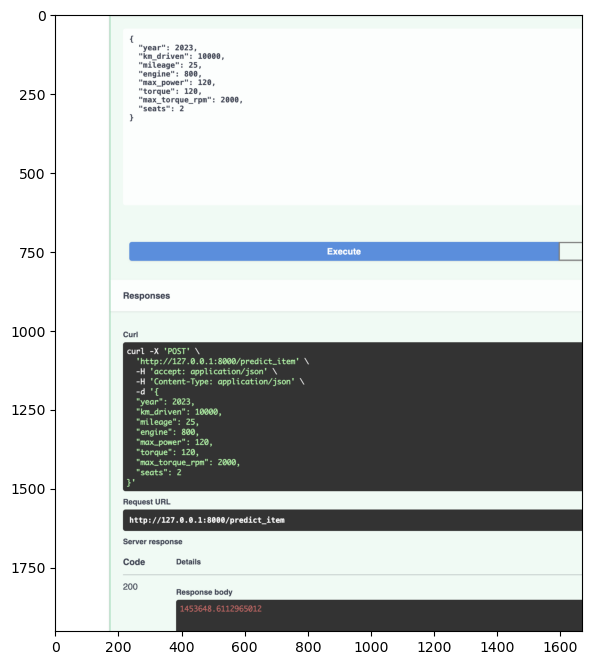

In [1641]:
from PIL import Image

image = Image.open('Снимок экрана 2023-11-30 в 23.22.51.png')
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.show()

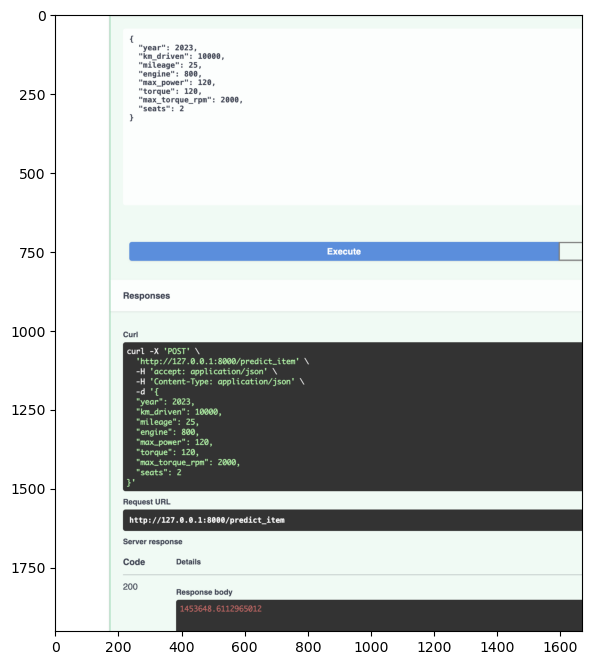

In [1642]:
image = Image.open('Снимок экрана 2023-11-30 в 23.22.51.png')
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.show()

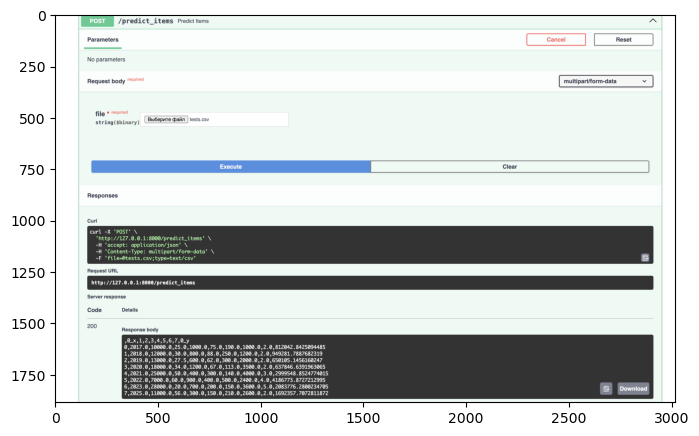

In [1643]:
image = Image.open('Снимок экрана 2023-12-01 в 02.10.31.png')
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.show()

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link

In [1595]:
# r = pd.DataFrame(pred)

In [1623]:
# m = pd.DataFrame(model7.coef_).T
# m.columns = df_X_norm2_tr.columns
# m['intercept'] = model7.intercept_
# m = m[['intercept', 'km_driven', 'engine', 'max_power', 'horsepower', 'More than one', 'One', 'other', 'year']]
# serialized_data = pickle.dumps(m)

# with open('data.pickle7', 'wb') as file:
#     file.write(serialized_data)

In [1625]:
# m = m[['intercept', 'km_driven', 'engine', 'max_power', 'horsepower', 'More than one', 'One', 'other', 'year']]

In [1614]:
# X_train['km_driven'].mean()

73952.24246575343

In [1626]:
# serialized_data = pickle.dumps(m)

# with open('data.pickle7', 'wb') as file:
#     file.write(serialized_data)

In [1627]:
# m

,intercept,km_driven,engine,max_power,horsepower,More than one,One,other,year
0,-613737.24001,-782954.744069,618907.444853,3.472769e+06,-411937.934853,-765724.80213,-688389.175483,1.454114e+06,1.272240e+06


In [1637]:
# df = pd.DataFrame({'year':[2017, 2018, 2019, 2020, 2021, 2022, 2023, 2025],
#                    'km_driven':[10000, 12000, 13000, 18000, 25000, 7000, 28000, 11000],
#                    'mileage':[25, 30, 27.5, 34, 50, 60, 20, 56],
#                    'engine':[1000, 800, 600, 1200, 400, 900, 700, 300],
#                    'max_power':[75, 88, 62, 67, 300, 400, 200, 150 ],
#                    'torque':[190, 250, 300, 113, 140, 500, 150, 210],
#                    'max_torque_rpm':[1000, 1200, 2000, 3500, 4000, 2400, 3600, 2600],
#                    'seats':[2, 2, 2, 2, 3, 4, 5, 2]})

In [1636]:
# df_train['torque']

0       190.000000
1       250.000000
2       219.668960
3       112.776475
4       113.750000
           ...    
5835     96.100000
5836     90.000000
5837    113.700000
5838    235.359600
5839    190.000000
Name: torque, Length: 5840, dtype: float64

In [1638]:
# df.to_csv('tests.csv', index=False)